<h1>Machine Learning</h1>

![Machine-Learning-MIT.](https://mitsloan.mit.edu/sites/default/files/styles/2_1_large_1050x525/public/2021-04/machine-learning-infographic_2.jpg?h=e9dd200c&itok=7tbLGyrT)  

Find definition of Machine learning in my notes

Tumor weight >400 g

2.
Tumor size >10.5 cm
https://www.sciencedirect.com/topics/nursing-and-health-professions/tumor-weight

<h1>KNN</h1>

![1NN.](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/Knn_k1_z96jba.png)  

![KNN.](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png)  

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('../Files/Iris_2_species.csv')

In [122]:
df.head()

,SepalLengthCm,SepalWidthCm,Species
0,7.0,3.2,Iris-versicolor
1,6.4,3.2,Iris-versicolor
2,6.9,3.1,Iris-versicolor
3,5.5,2.3,Iris-versicolor
4,6.5,2.8,Iris-versicolor


In [123]:
df.tail()

,SepalLengthCm,SepalWidthCm,Species
95,6.7,3.0,Iris-virginica
96,6.3,2.5,Iris-virginica
97,6.5,3.0,Iris-virginica
98,6.2,3.4,Iris-virginica
99,5.9,3.0,Iris-virginica


In [124]:
df.sort_values(['Species' ,'SepalLengthCm' ] , inplace = True)
# Split data in two parts 

df_train  = df.iloc[1: , :]

df_test = df.iloc[0]


<h1>1NN:  first Nearest Neighbors</h1>

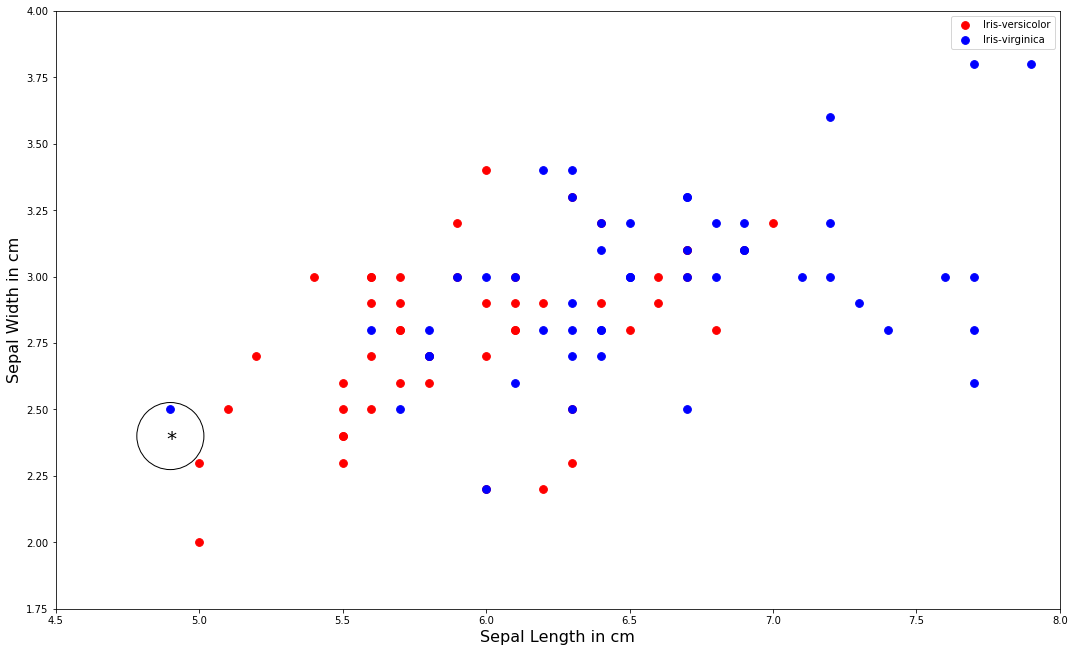

In [125]:
fig , ax = plt.subplots(figsize=(18 ,11))
ax.scatter(df_train.query('Species == "Iris-versicolor"')['SepalLengthCm'] ,
           df_train.query('Species == "Iris-versicolor"')['SepalWidthCm'] , s=60 , label= 'Iris-versicolor' ,color= 'red' )

ax.scatter(df_train.query('Species == "Iris-virginica"')['SepalLengthCm'] ,
           df_train.query('Species == "Iris-virginica"')['SepalWidthCm'] , s=60 , label= 'Iris-virginica' ,color='blue' )
ax.scatter(4.9 , 2.4 , s= 4500 , facecolors='none', edgecolors='black')
ax.set_xlabel('Sepal Length in cm' ,fontsize=16)
ax.set_ylabel('Sepal Width in cm' ,fontsize=16)
ax.annotate('*', xy=(0.11 ,0.275) ,  xycoords = 'axes fraction'  , fontsize= 20)
ax.set_xlim([4.5, 8])
ax.set_ylim([1.75, 4])


ax.legend();


<h2>The <span style="color:pink">(class)</span> of one flower (*) is hidden from you: Can you say <span style="color:pink">(predict)</span> which flower <span style="color:pink">(class)</span> is it?</h2>

<h1>KNN:  K Nearest Neighbors</h1>

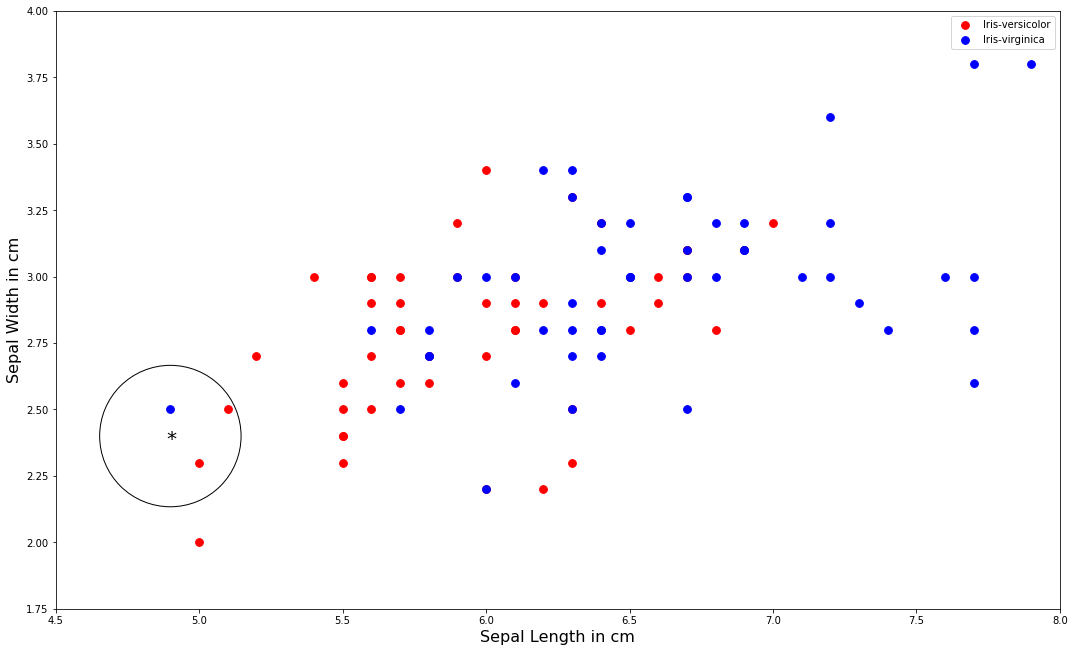

In [112]:
fig , ax = plt.subplots(figsize=(18 ,11))
ax.scatter(df_train.query('Species == "Iris-versicolor"')['SepalLengthCm'] ,
           df_train.query('Species == "Iris-versicolor"')['SepalWidthCm'] , s=60 , label= 'Iris-versicolor' ,color= 'red' )

ax.scatter(df_train.query('Species == "Iris-virginica"')['SepalLengthCm'] ,
           df_train.query('Species == "Iris-virginica"')['SepalWidthCm'] , s=60 , label= 'Iris-virginica' ,color='blue' )
ax.scatter(4.9 , 2.4 , s= 20000 , facecolors='none', edgecolors='black')
ax.set_xlabel('Sepal Length in cm' ,fontsize=16)
ax.set_ylabel('Sepal Width in cm' ,fontsize=16)
ax.annotate('*', xy=(0.11 ,0.275) ,  xycoords = 'axes fraction'  , fontsize= 20)
ax.set_xlim([4.5, 8])
ax.set_ylim([1.75, 4])


ax.legend();

In [ ]:
<h1>K is an <span style="color:pink">hyperparameter</span>: which one is better? 1 or 3</h1>

<h2>K is an <span style="color:pink">hyperparameter</span>: which one is better? 1 or 3</h2>

<h2>Which one  gives the best <span style="color:pink">performance</span>?</h2>

<h2><span style="color:pink">Accuracy</span></h2>

In [ ]:
$$ \mbox{Accuracy}  = \frac{\mbox{Number of correct predictions}}{\mbox{ Total number of predictions} }$$

What is unseen data in machine learning?
The unseen data is all types of data that a model has never learned before

![Machine-Learning-spam-detection.](https://miro.medium.com/max/1400/1*AOwsTgJnh_b_oLIAaAn8Bg.png)      

In [144]:
from sklearn.model_selection import train_test_split

In [150]:
X = df[['SepalLengthCm' ,  'SepalWidthCm']]
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [166]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [167]:
knn.fit(X_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [168]:
predict = knn.predict(X_test)

In [169]:
correct = 0
for i , j in zip(y_test , predict):
    result = 'incorrect prediction'
    if i == j :
        correct += 1
        result = 'correct prediction'
        
    print(f'{i:17}  {j:17} {result}')

print()
print(f'Accuracy = {correct / y_test.shape[0]}')

Iris-virginica     Iris-virginica    correct prediction
Iris-virginica     Iris-versicolor   incorrect prediction
Iris-virginica     Iris-virginica    correct prediction
Iris-versicolor    Iris-versicolor   correct prediction
Iris-versicolor    Iris-virginica    incorrect prediction
Iris-versicolor    Iris-virginica    incorrect prediction
Iris-versicolor    Iris-versicolor   correct prediction
Iris-virginica     Iris-virginica    correct prediction
Iris-versicolor    Iris-versicolor   correct prediction
Iris-versicolor    Iris-versicolor   correct prediction
Iris-versicolor    Iris-versicolor   correct prediction
Iris-versicolor    Iris-versicolor   correct prediction
Iris-virginica     Iris-virginica    correct prediction
Iris-versicolor    Iris-virginica    incorrect prediction
Iris-virginica     Iris-virginica    correct prediction
Iris-versicolor    Iris-versicolor   correct prediction
Iris-virginica     Iris-versicolor   incorrect prediction
Iris-virginica     Iris-versicolor   i

In [162]:
y_test.shape[0]

33

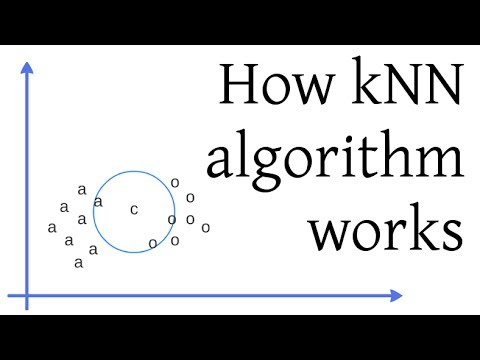

In [142]:
from IPython.display import HTML
from IPython.display import YouTubeVideo
url = "https://www.youtube.com/watch?v=UqYde-LULfs"
YouTubeVideo( url.split("=")[-1], width=800, height=600)

In [ ]:
<h1>classification use cases</h1>

In [ ]:
Why machine learning is important?

<h2>Spam detection </h2>

![Machine-Learning-spam-detection.](https://miro.medium.com/max/1400/1*hsyCZOYoGrX6BJsj4Lgrhg.png)  

<h2>Fraud detection</h2>

![Machine-Learning-spam-detection.](https://www.bluegranite.com/hs-fs/hubfs/image-png-Jul-23-2021-03-58-27-53-PM.png?width=750&name=image-png-Jul-23-2021-03-58-27-53-PM.png)  

<h2>Text Classification</h2>

In [ ]:
![Machine-Learning-spam-detection.](https://miro.medium.com/max/1400/1*HgXA9v1EsqlrRDaC_iORhQ.png)  

<h2>Linear regression</h2>

In [189]:
X = np.arange(100)
e = np.random.randn(100)
b0 = 8 
b1 = 10
Target = b1 * X + b0 - 50*e

In [190]:
df = pd.DataFrame({'X': X , 'Target' : Target})

In [225]:
Line_1 = 10 * X + 8
Line_2 =  5 * X + 150
Line_3 =  0 * X + 400
Line_4 =  - 3 * X + 500

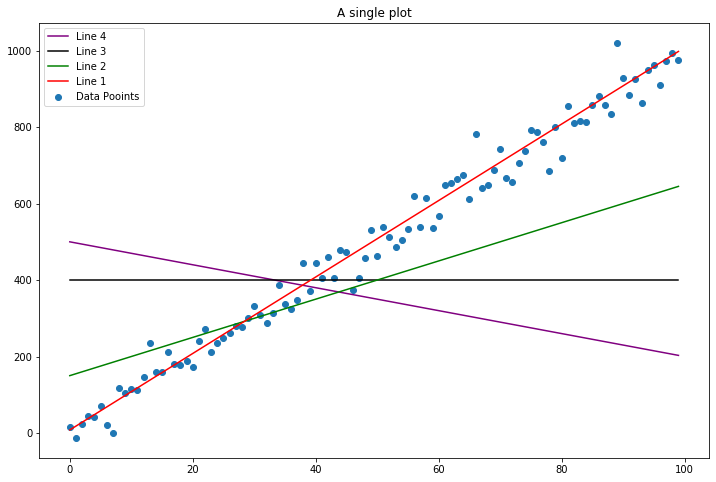

In [230]:
fig, ax = plt.subplots(figsize=(12 , 8))
ax.scatter(X, Y , label = 'Data Pooints')
ax.plot(X , Line_4 , label = 'Line 4' , color= 'purple')
ax.plot(X , Line_3 , label = 'Line 3' , color= 'black')
ax.plot(X , Line_2 , label = 'Line 2' , color= 'green')
ax.plot(X , Line_1 , label = 'Line 1' , color= 'red')






ax.set_title('A single plot'  )
ax.legend()

Which line is a line of best fit?

Which line is better? How to paraphase this question in mathematics terms

![Machine-Learning-spam-detection.](https://i.stack.imgur.com/zoYKG.png)      

Least square method

![Classification-vs-Regression.](https://www.researchgate.net/profile/Sami-Belkacem/publication/350993856/figure/fig2/AS:1014557191450626@1618900692681/Classification-vs-Regression.jpg)      

In [ ]:
![Classification-vs-Regression.](https://www.researchgate.net/profile/Rory-Bunker/publication/319937079/figure/fig1/AS:542578279366656@1506372150206/Supervised-Learning-versus-Unsupervised-Learning-Mathworks-nd.png)      